# Loan Status Prediction

## Data preprocessing

### importing libraries :

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### importing data set

In [0]:
test_data = pd.read_csv('/content/test.csv')
train_data = pd.read_csv('/content/train.csv')

In [3]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
test_data.shape

(367, 12)

In [6]:
train_data.shape

(614, 13)

### visualization

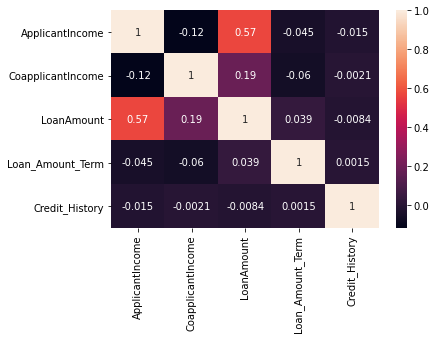

In [7]:
sns.heatmap(train_data.corr(),annot = True)

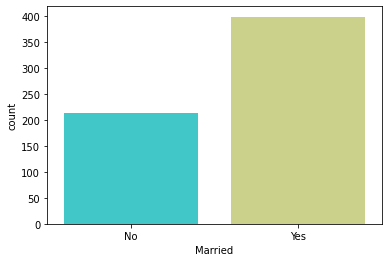

In [8]:
sns.countplot('Married',data = train_data, palette = "rainbow")

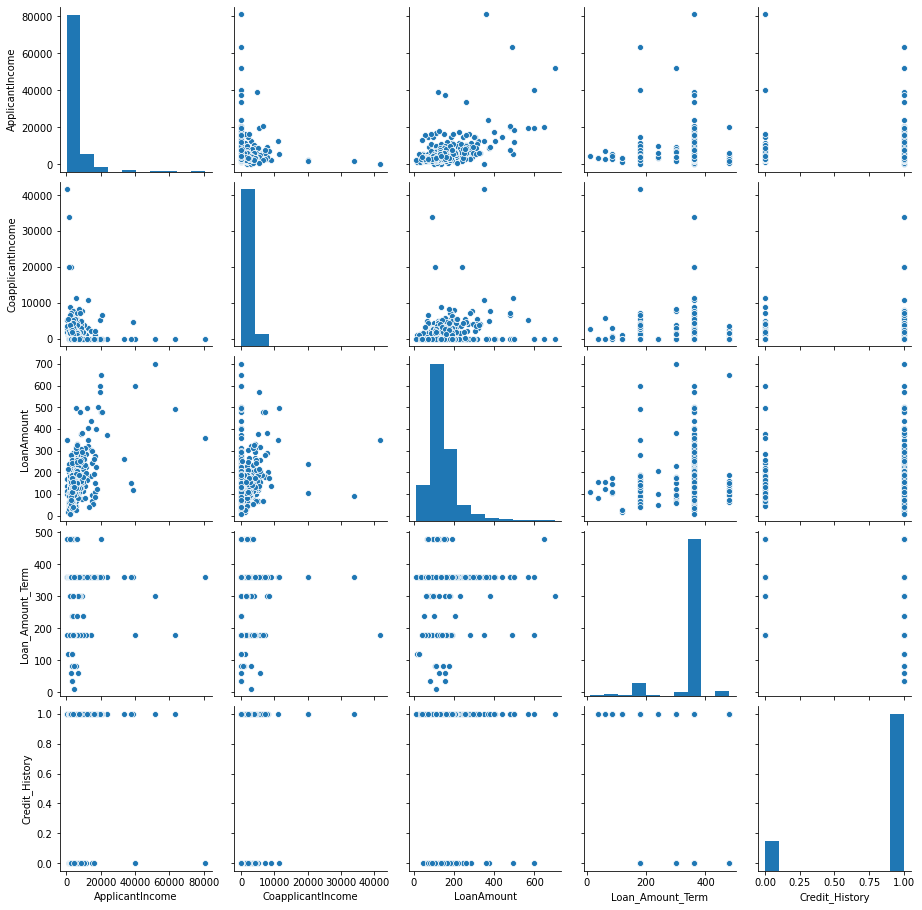

In [9]:
sns.pairplot(train_data)

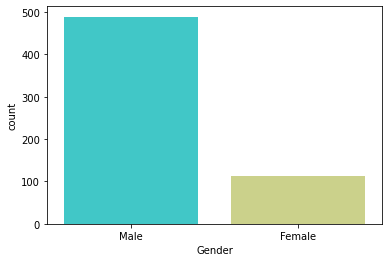

In [10]:
sns.countplot('Gender',data = train_data, palette = "rainbow")

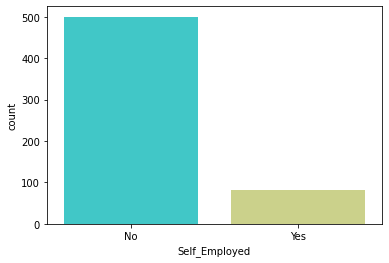

In [11]:
sns.countplot('Self_Employed',data = train_data, palette = "rainbow")

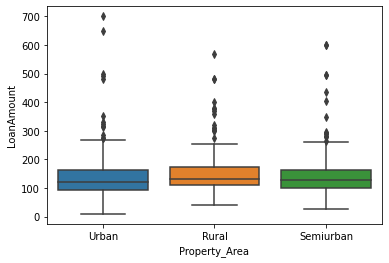

In [12]:
sns.boxplot(x = "Property_Area",y = "LoanAmount",data = train_data)

### handling null values

In [13]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
test_data.shape

(367, 12)

In [15]:
train_data.shape

(614, 13)

In [16]:
test_data.isnull().any()

Loan_ID              False
Gender                True
Married              False
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
dtype: bool

In [17]:
train_data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

handling null values in train data

In [0]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace = True)
train_data['Married'].fillna(train_data['Married'].mode()[0],inplace = True)
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0],inplace = True)
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0],inplace = True)
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(),inplace = True)
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mean(),inplace = True)
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0],inplace = True)

In [19]:
train_data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

handling null values in test data

In [0]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace = True)
test_data['Dependents'].fillna(test_data['Dependents'].mode()[0],inplace = True)
test_data['Self_Employed'].fillna(test_data['Self_Employed'].mode()[0],inplace = True)
test_data['LoanAmount'].fillna(test_data['LoanAmount'].mean(),inplace = True)
test_data['Loan_Amount_Term'].fillna(test_data['Loan_Amount_Term'].mean(),inplace = True)
test_data['Credit_History'].fillna(test_data['Credit_History'].mode()[0],inplace = True)

In [21]:
test_data.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

### label encoding

In [22]:
train_data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['Gender'] = le.fit_transform(train_data['Gender'])
train_data['Married'] = le.fit_transform(train_data['Married'])
train_data['Education'] = le.fit_transform(train_data['Education'])
train_data['Self_Employed'] = le.fit_transform(train_data['Self_Employed'])
train_data['Property_Area'] = le.fit_transform(train_data['Property_Area'])
train_data['Loan_Status'] = le.fit_transform(train_data['Loan_Status'])
train_data['Dependents'] = le.fit_transform(train_data['Dependents'])

In [0]:
train_data.drop(['Loan_ID'],axis = 1,inplace = True)

In [26]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [27]:
train_data.shape

(614, 12)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


### one hot encoding 

In [0]:
x = train_data.iloc[:,0:11].values
y = train_data.iloc[:,11:].values

In [30]:
x.shape

(614, 11)

columns having more than two values
dependents - 4 values , col.2
property_area -3 values , col.10

In [0]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
p = oh.fit_transform(x[:,2:3]).toarray()

In [32]:
x.shape

(614, 11)

In [0]:
q = oh.fit_transform(x[:,10:11]).toarray()

In [34]:
x.shape

(614, 11)

In [0]:
x = np.delete(x,2,axis = 1)

In [36]:
x.shape

(614, 10)

In [0]:
x = np.delete(x,9,axis = 1)

In [38]:
x.shape

(614, 9)

In [0]:
x = np.concatenate((q,p,x), axis = 1)

In [40]:
x.shape

(614, 16)

### scaling

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state = 0)

In [42]:
x_test.shape

(62, 16)

In [43]:
x_train.shape

(552, 16)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logistic.predict(x_test)

In [0]:
from sklearn.metrics import accuracy_score
logacc = accuracy_score(y_test,y_pred)

In [48]:
logacc

0.8709677419354839

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [50]:
cm

array([[ 8,  7],
       [ 1, 46]])

In [0]:
import sklearn.metrics as metrics
fpr , tpr , threshold = metrics.roc_curve(y_test,y_pred)
roc_auc = metrics.auc(fpr,tpr)

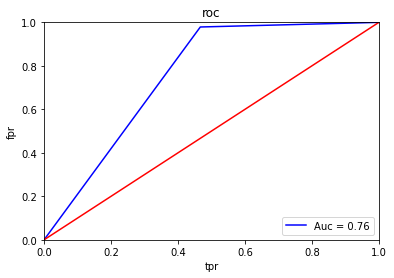

In [52]:
plt.title("roc")
plt.plot(fpr,tpr,color =  'blue',label = 'Auc = %0.2f'% roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

# DECISION TREE CLASSIFIER

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
decisiontree = classifier.predict(x_test)

In [55]:
cm2 = confusion_matrix(y_test,decisiontree)
cm2

array([[10,  5],
       [13, 34]])

In [0]:
import sklearn.metrics as metrics
fpr1 , tpr1 , threshold1 = metrics.roc_curve(y_test,decisiontree)
roc_auc1 = metrics.auc(fpr1,tpr1)

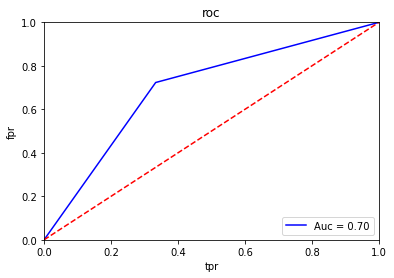

In [57]:
plt.title("roc")
plt.plot(fpr1,tpr1,color =  'blue',label = 'Auc = %0.2f'% roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

In [0]:
desacc = accuracy_score(y_test,decisiontree)

In [59]:
desacc

0.7096774193548387

# RANDOM FOREST CLASSIFIER

In [60]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(n_estimators = 20 , random_state = 0)
rand.fit(x_train,y_train) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
randomforest = rand.predict(x_test)

In [62]:
cm3 = confusion_matrix(y_test,randomforest)
cm3

array([[ 9,  6],
       [ 6, 41]])

In [0]:
randacc = accuracy_score(y_test,randomforest)

In [64]:
randacc

0.8064516129032258

In [0]:
fpr2 , tpr2 , threshold2 = metrics.roc_curve(y_test,randomforest)
roc_auc2 = metrics.auc(fpr2,tpr2)

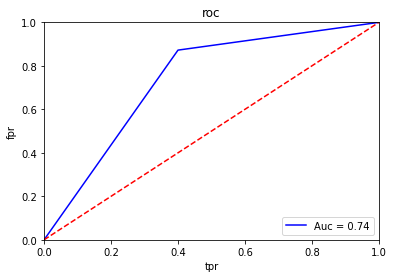

In [66]:
plt.title("roc")
plt.plot(fpr2,tpr2,color =  'blue',label = 'Auc = %0.2f'% roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()

# K NEAREST NEIGHBOURS 

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski')
knn.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
knnpred = knn.predict(x_test)

In [0]:
knnacc = accuracy_score(y_test,knnpred)

In [70]:
knnacc

0.8387096774193549

In [71]:
cm4 = confusion_matrix(y_test,knnpred)
cm4

array([[ 7,  8],
       [ 2, 45]])

In [0]:
fpr3 , tpr3 , threshold3 = metrics.roc_curve(y_test,knnpred)
roc_auc3 = metrics.auc(fpr3,tpr3)

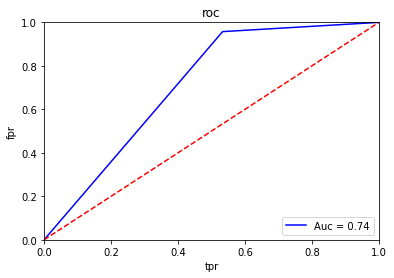

In [73]:
plt.title("roc")
plt.plot(fpr3,tpr3,color =  'blue',label = 'Auc = %0.2f'% roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('tpr')
plt.ylabel('fpr')
plt.show()